In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from fbprophet import Prophet
#import fbprophet

In [2]:
bd_vendas = pd.read_csv('train.csv')

C:\Users\zerom\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
bd_vendas.shape

(1017209, 9)

In [4]:
bd_vendas.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


### Dados das vendas

In [5]:
# Vendo quais são/quantos os tipos de dados das colunas
bd_vendas['DayOfWeek'].unique()

array([5, 4, 3, 2, 1, 7, 6], dtype=int64)

In [6]:
bd_vendas['Open'].unique()

array([1, 0], dtype=int64)

In [7]:
bd_vendas['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [8]:
bd_vendas['SchoolHoliday'].unique()

array([1, 0], dtype=int64)

In [9]:
# vendo as ultimas linhas
bd_vendas.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [10]:
bd_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [11]:
bd_vendas.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


### Dados das lojas

In [12]:
bd_lojas = pd.read_csv('store.csv')

In [13]:
bd_lojas.shape

(1115, 10)

In [14]:
bd_lojas.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [15]:
bd_lojas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [16]:
bd_lojas.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


## Exploração dos dados

### Dados das Vendas

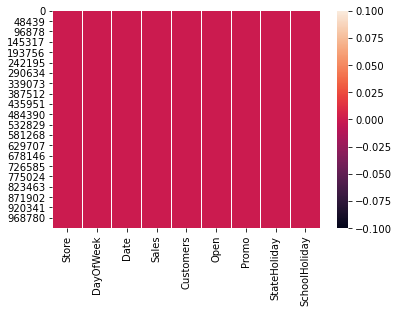

In [17]:
sns.heatmap(bd_vendas.isnull());

In [18]:
bd_vendas.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

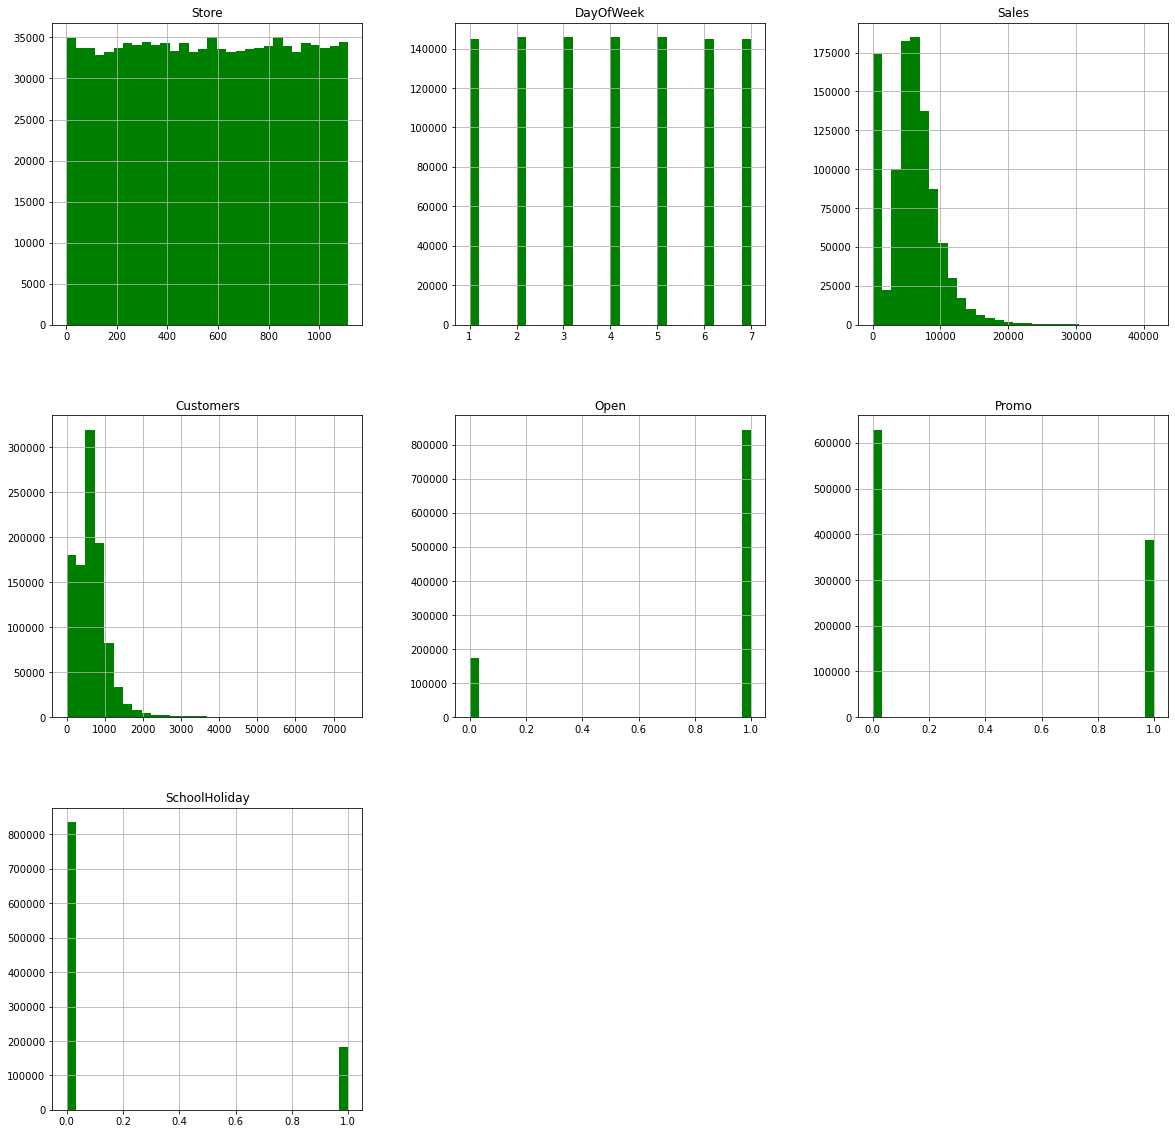

In [19]:
bd_vendas.hist(bins = 30, figsize = (20,20), color = 'g');

<h2> Gerando 2 nvos bancos de dados</h2>
<p>
Um para quando as lojas estverem abertas e outro para quando as lojass estiverem fechadas
</p>

In [20]:
# Banco para as lojas Fechadas
bd_lojas_fechada = bd_vendas[bd_vendas['Open'] == 0]

# Banco para as lojas Abertas
bd_lojas_abertas = bd_vendas[bd_vendas['Open'] == 1]

In [21]:
print("Total = ", len(bd_vendas))
print('Número de lojas/dias fechado = ', len(bd_lojas_fechada))
print('Número de lojas/dias abertas = ', len(bd_lojas_abertas))

Total =  1017209
Número de lojas/dias fechado =  172817
Número de lojas/dias abertas =  844392


In [22]:
# fazendo a média de lojas fechado
172817 / len(bd_lojas)

154.99282511210762

In [23]:
bd_vendas.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [24]:
bd_vendas = bd_vendas[bd_vendas['Open'] == 1]

In [25]:
bd_vendas.shape

(844392, 9)

In [26]:
bd_vendas

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1


In [27]:
# Como temos 2 bancos de dados, um aberto e outro fechado, nao precisa da Informação Open
bd_vendas.drop(['Open'], axis = 1, inplace = True)

In [28]:
bd_vendas.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1


In [29]:
bd_vendas.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


### Dados das lojas

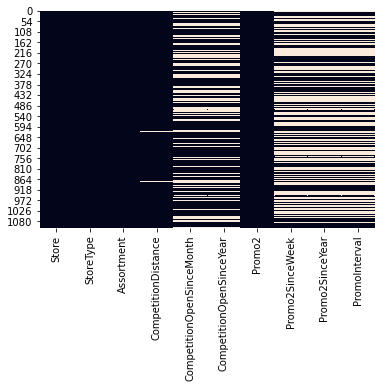

In [30]:
# Conferindo valores nulos (NaN)
sns.heatmap(bd_lojas.isnull(), cbar=False);

In [31]:
# Organizando e tratando os dados que estão faltando na base de dados

In [32]:
bd_lojas[bd_lojas['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [33]:
bd_lojas[bd_lojas['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [34]:
bd_lojas[bd_lojas['CompetitionOpenSinceYear'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [35]:
# Como onde não teve promção  (Promo2 == 0) não foram preenchidos, vamos substituir
# esses valores por zero (0)
colunas_substituidas = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
            'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']
for str in colunas_substituidas:
    bd_lojas[str].fillna(0, inplace = True)
    # onde for NaN vai receber 0

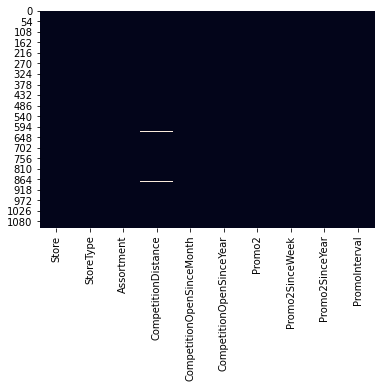

In [36]:
sns.heatmap(bd_lojas.isnull(), cbar = False);

In [37]:
bd_lojas['CompetitionDistance'].fillna(bd_lojas['CompetitionDistance'].mean(), inplace = True)

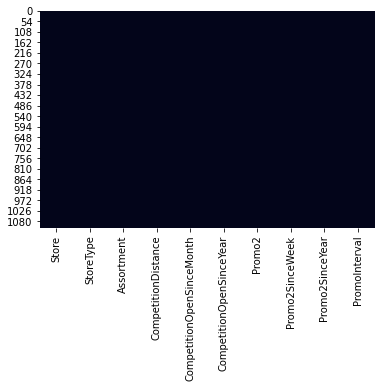

In [38]:
sns.heatmap(bd_lojas.isnull(), cbar = False);

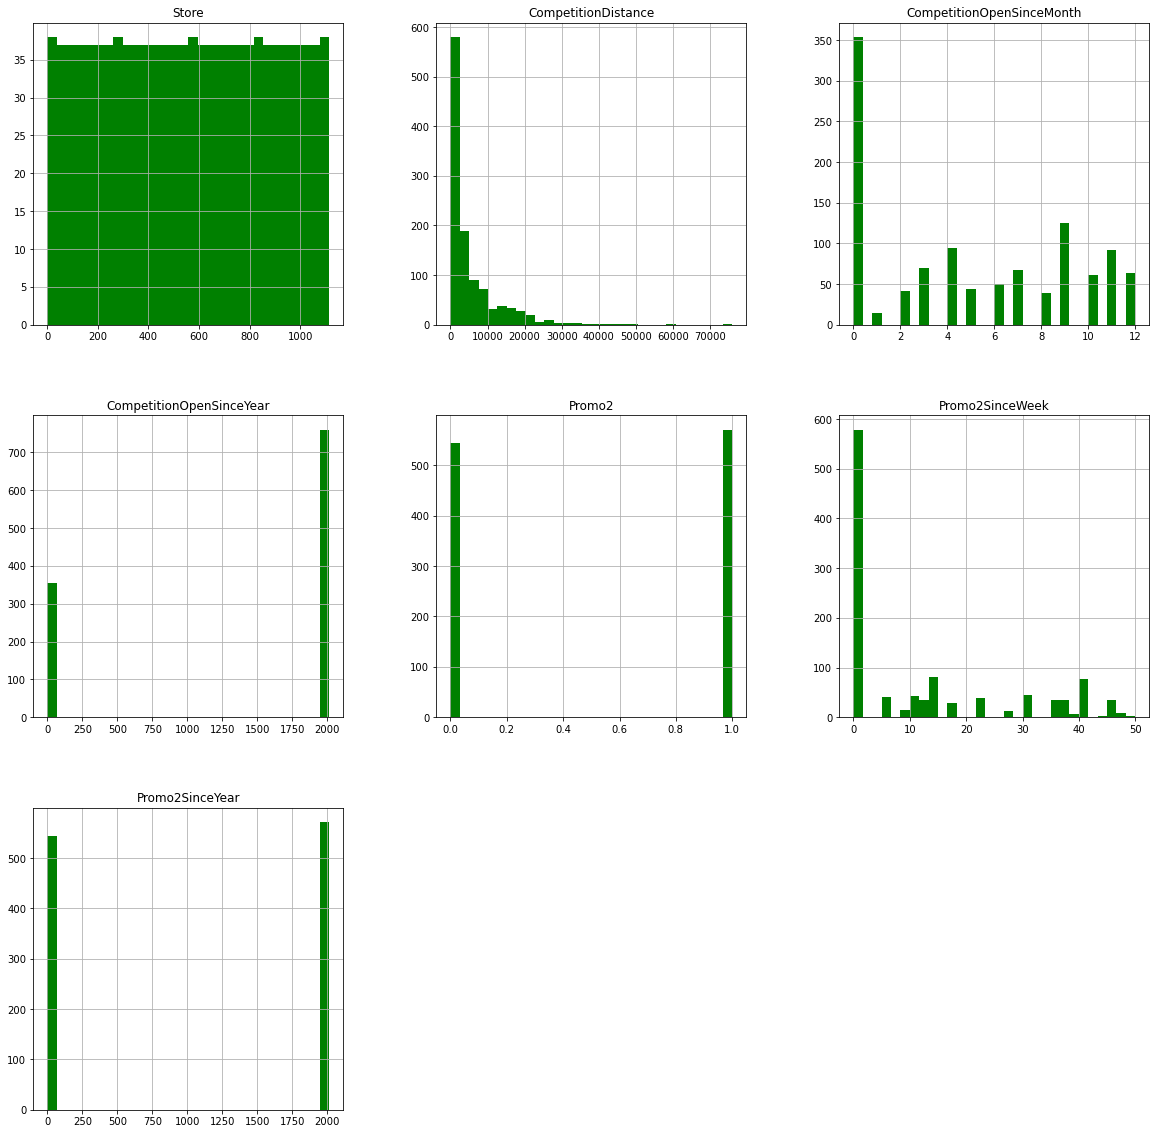

In [39]:
bd_lojas.hist(bins=30, figsize=(20,20), color = 'g');

### Dados unidos (vendas + lojas)

In [40]:
bd_vendas.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1


In [41]:
bd_lojas.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [42]:
# COmando para juntar os 2 bancos de dados
bd_completo = pd.merge(bd_vendas, bd_lojas , how = 'inner', on = 'Store')
# on = 'Store'  -- existe 2 colunas de mesmo nome e atributos

In [43]:
bd_completo.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [44]:
bd_completo.shape

(844392, 17)

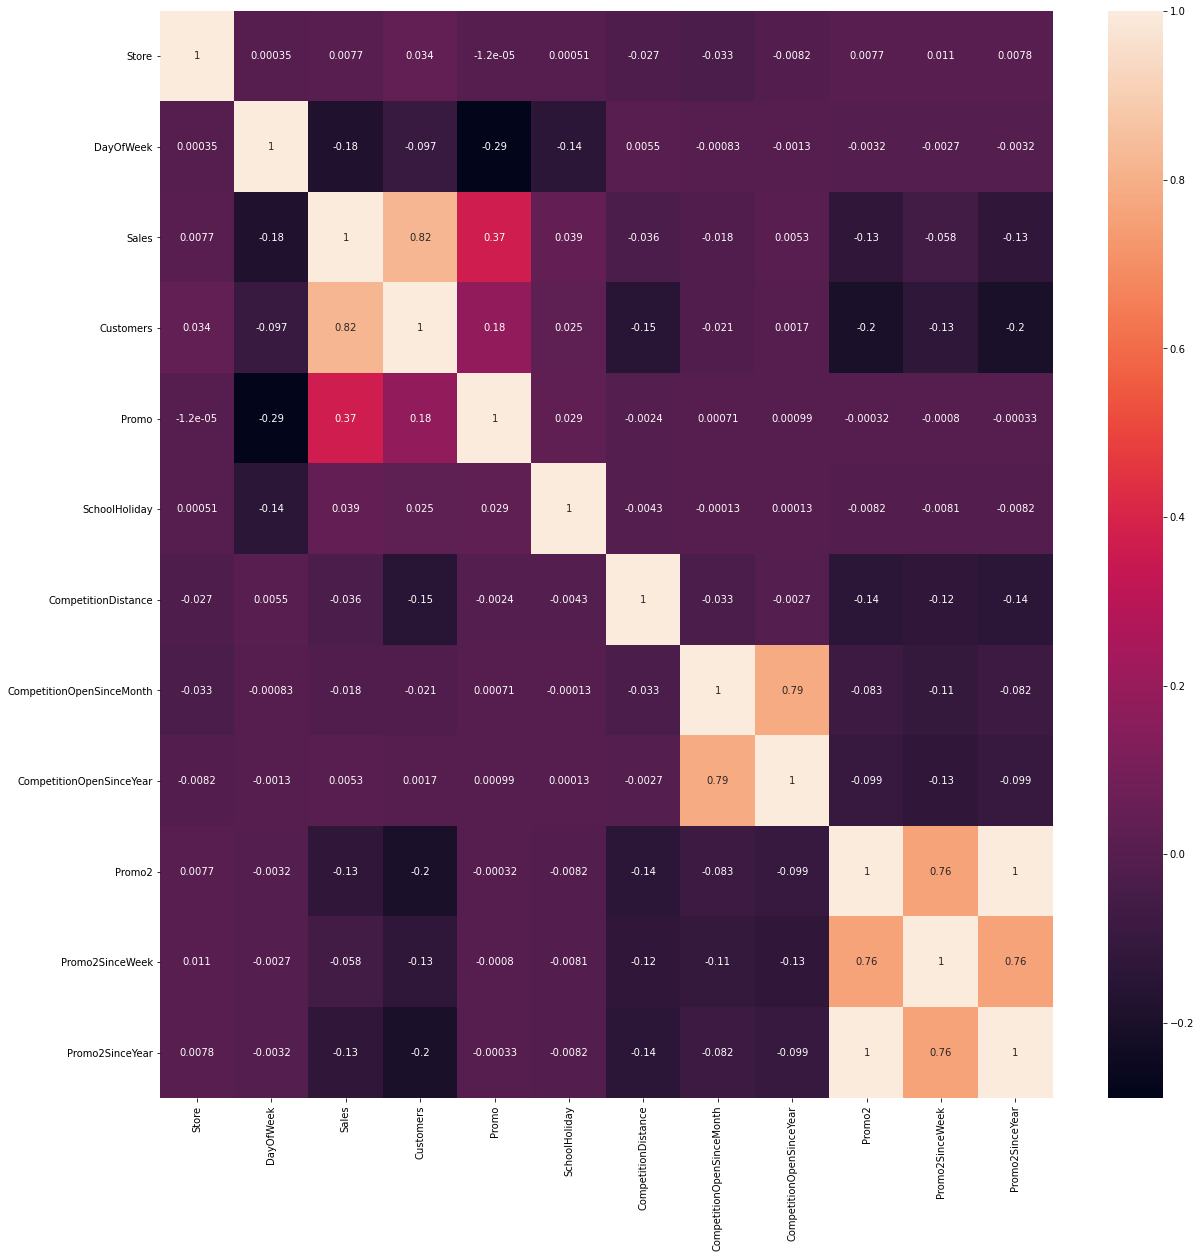

In [45]:
correlacoes = bd_completo.corr()
figura, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlacoes, annot = True);

In [46]:
correlacoes = bd_completo.corr()['Sales'].sort_values()
correlacoes

DayOfWeek                   -0.178736
Promo2SinceYear             -0.127621
Promo2                      -0.127596
Promo2SinceWeek             -0.058476
CompetitionDistance         -0.036343
CompetitionOpenSinceMonth   -0.018370
CompetitionOpenSinceYear     0.005266
Store                        0.007710
SchoolHoliday                0.038617
Promo                        0.368145
Customers                    0.823597
Sales                        1.000000
Name: Sales, dtype: float64

In [47]:
# Fazendo a correlação de somente de um atributos com os outros
# no caso o atributo 'Sales'
correlacoes = bd_completo.corr()['Sales'].sort_values()
correlacoes

DayOfWeek                   -0.178736
Promo2SinceYear             -0.127621
Promo2                      -0.127596
Promo2SinceWeek             -0.058476
CompetitionDistance         -0.036343
CompetitionOpenSinceMonth   -0.018370
CompetitionOpenSinceYear     0.005266
Store                        0.007710
SchoolHoliday                0.038617
Promo                        0.368145
Customers                    0.823597
Sales                        1.000000
Name: Sales, dtype: float64

### Criando alguns gráficos

In [48]:
# Vamos fatiar o atributo data em: ano, mes, dia
# para fazermos estudos com essas variáveis


In [49]:
# Criando uma coluna chamada Ano (Year)
bd_completo['Year'] = pd.DatetimeIndex(bd_completo['Date']).year

# Criando uma coluna chamada mes (Month)
bd_completo['Month'] = pd.DatetimeIndex(bd_completo['Date']).month

# Criando uma coluna chamada dia (Day)
bd_completo['Day'] = pd.DatetimeIndex(bd_completo['Date']).day

In [50]:
bd_completo.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,30
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,29
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,28
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,27


Text(0.5, 1.0, 'Média de vendas por mês')

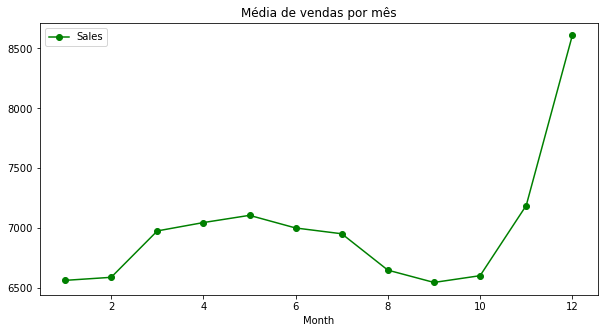

In [51]:
axis = bd_completo.groupby('Month')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'g')
axis.set_title('Média de vendas por mês')

Text(0.5, 1.0, 'Média de vendas por dia')

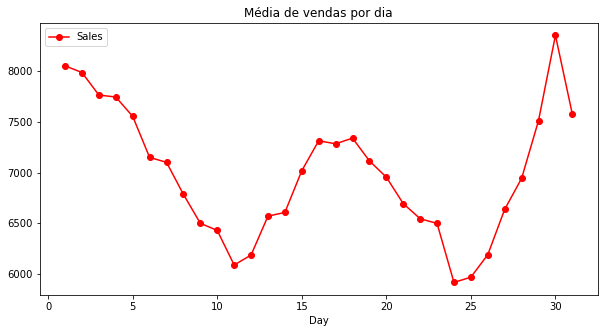

In [52]:
axis = bd_completo.groupby('Day')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Média de vendas por dia')

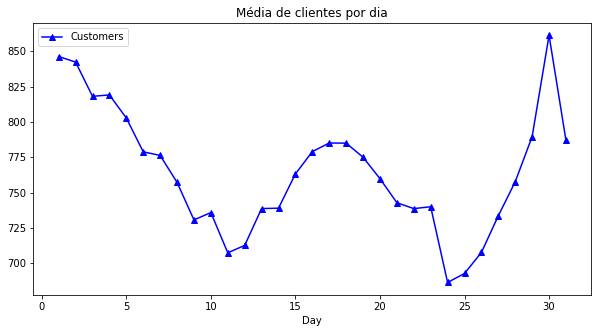

In [53]:
axis = bd_completo.groupby('Day')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Média de clientes por dia');

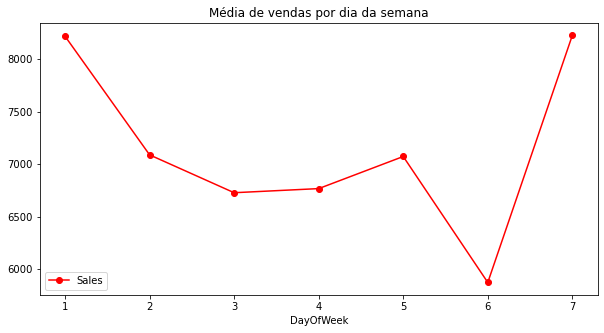

In [54]:
axis = bd_completo.groupby('DayOfWeek')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Média de vendas por dia da semana');

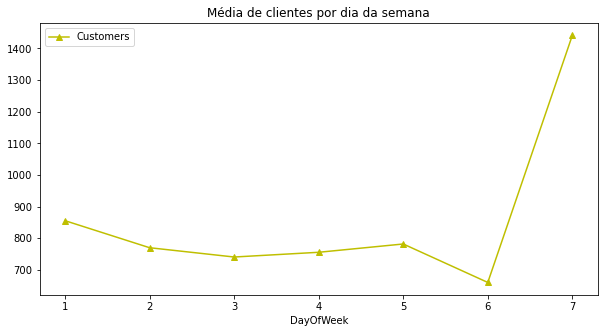

In [55]:
axis = bd_completo.groupby('DayOfWeek')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'y')
axis.set_title('Média de clientes por dia da semana');

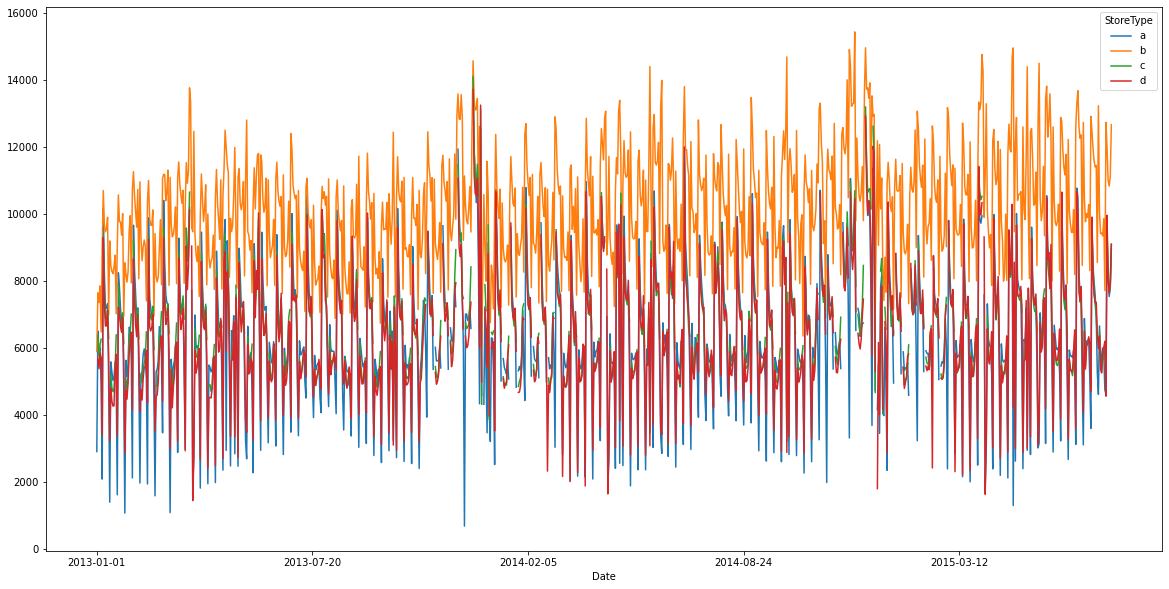

In [56]:
fig, ax = plt.subplots(figsize = (20,10))
bd_completo.groupby(['Date', 'StoreType']).mean()['Sales'].unstack().plot(ax = ax);

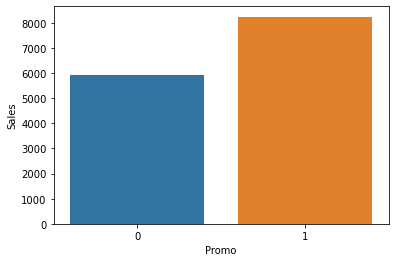

In [57]:
sns.barplot(x = 'Promo', y = 'Sales', data = bd_completo);

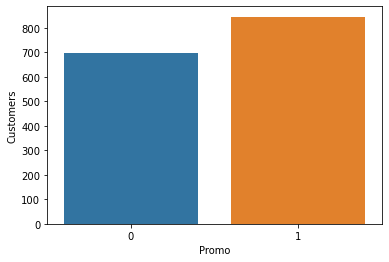

In [58]:
sns.barplot(x = 'Promo', y = 'Customers', data = bd_completo);

## Treinamento do modelo - parte 1

In [59]:
# formato obrigatorio pelo algoritimo de previsao do facebook
# Date: ds
# Sales : y

In [68]:
# criando uma função (obrigatorio)
def previsao_vendas(store_id, sales_df, periods):
    sales_df = sales_df[sales_df['Store'] == store_id]
    sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales': 'y'}) # mudando o nome das colunas
    sales_df = sales_df.sort_values(by = 'ds') # ordenando as datas
    
    model = Prophet()
    model.fit(sales_df)
    future = model.make_future_dataframe(periods = periods)
    forecast = model.predict(future)
    figure1 = model.plot(forecast, xlabel = 'Time', ylabel = 'Vendas')
    figure2 = model.plot_components(forecast)

    return sales_df, forecast



INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


(              ds     y
 7819  2013-01-02  4812
 7818  2013-01-03  4675
 7817  2013-01-04  5114
 7816  2013-01-05  4256
 7815  2013-01-07  7804
 ...          ...   ...
 7040  2015-07-27  7212
 7039  2015-07-28  6140
 7038  2015-07-29  5524
 7037  2015-07-30  6186
 7036  2015-07-31  7185
 
 [784 rows x 2 columns],
             ds        trend   yhat_lower   yhat_upper  trend_lower  \
 0   2013-01-02  5198.273657  4199.228027  6223.839345  5198.273657   
 1   2013-01-03  5199.030988  4008.393724  6154.360596  5199.030988   
 2   2013-01-04  5199.788320  4142.326975  6328.346750  5199.788320   
 3   2013-01-05  5200.545651  3445.139755  5532.568649  5200.545651   
 4   2013-01-07  5202.060314  4903.246186  7087.933650  5202.060314   
 ..         ...          ...          ...          ...          ...   
 839 2015-09-25  5952.578639  4971.717791  7063.230076  5952.578618   
 840 2015-09-26  5953.335976  4249.373042  6287.858423  5953.335954   
 841 2015-09-27  5954.093313  4771.414202  679

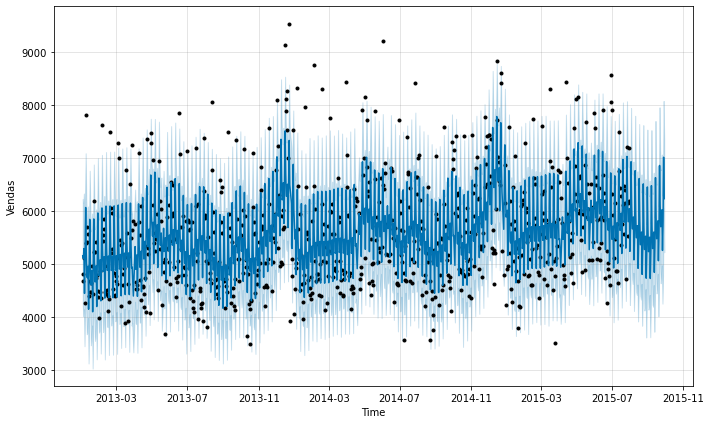

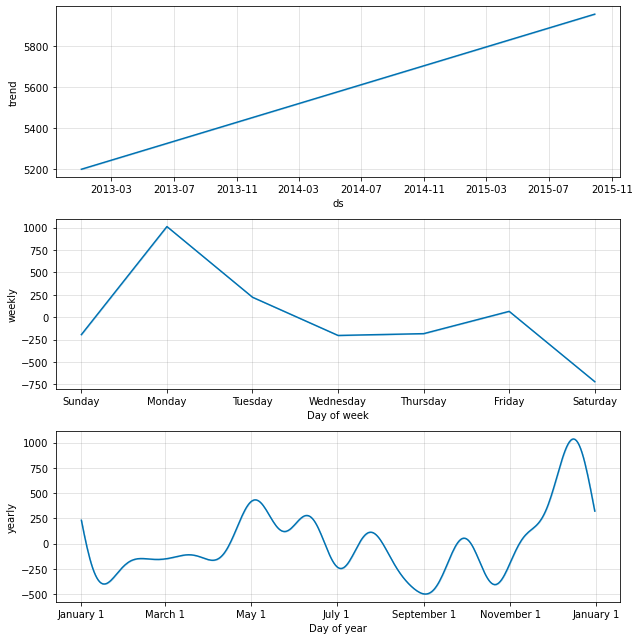

In [69]:
df = previsao_vendas(10, bd_completo, 60);
df

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


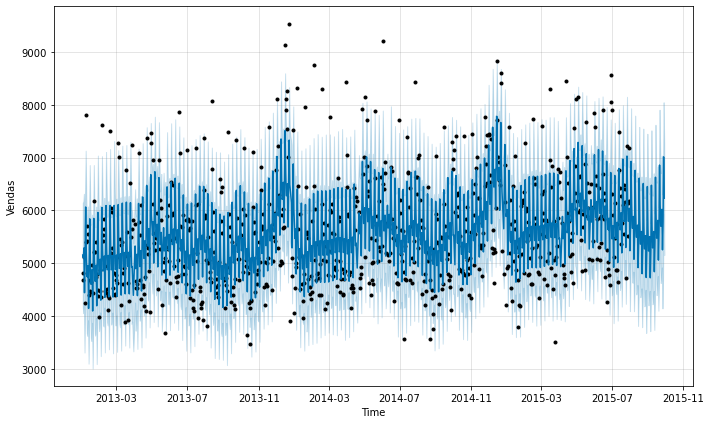

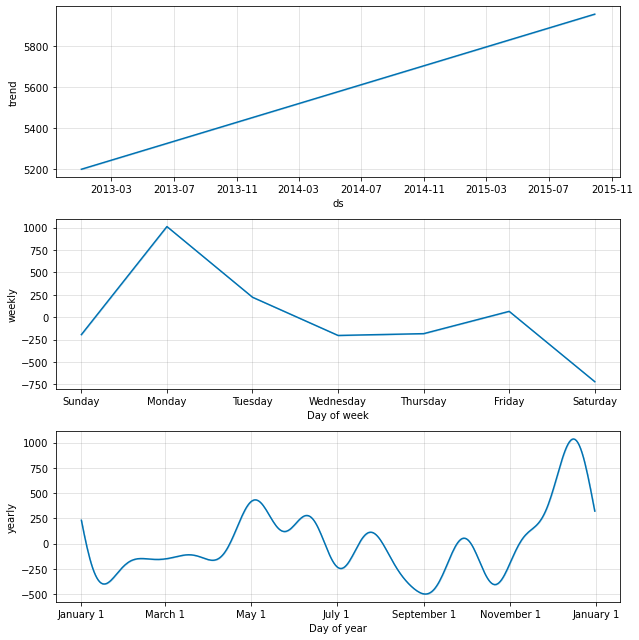

In [71]:
bd_original, previsao_vendas = previsao_vendas(10, bd_completo, 60)

In [72]:
bd_original.shape

(784, 2)

In [73]:
previsao_vendas.shape

(844, 19)

In [74]:
previsao_vendas.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-02,5198.273657,4162.593864,6143.724794,5198.273657,5198.273657,-44.535224,-44.535224,-44.535224,-203.624261,-203.624261,-203.624261,159.089036,159.089036,159.089036,0.0,0.0,0.0,5153.738433
1,2013-01-03,5199.030988,4054.587784,6167.061136,5199.030988,5199.030988,-93.434489,-93.434489,-93.434489,-183.584566,-183.584566,-183.584566,90.150076,90.150076,90.150076,0.0,0.0,0.0,5105.596499
2,2013-01-04,5199.788320,4228.475000,6314.782185,5199.788320,5199.788320,89.614049,89.614049,89.614049,65.474288,65.474288,65.474288,24.139762,24.139762,24.139762,0.0,0.0,0.0,5289.402369
3,2013-01-05,5200.545651,3310.364882,5518.073783,5200.545651,5200.545651,-757.964581,-757.964581,-757.964581,-719.648573,-719.648573,-719.648573,-38.316008,-38.316008,-38.316008,0.0,0.0,0.0,4442.581070
4,2013-01-07,5202.060314,5004.205242,7130.097154,5202.060314,5202.060314,862.084252,862.084252,862.084252,1012.547178,1012.547178,1012.547178,-150.462926,-150.462926,-150.462926,0.0,0.0,0.0,6064.144566


In [76]:
previsao_vendas.tail(60)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
784,2015-08-01,5910.925107,4094.205654,6372.443143,5910.925107,5910.925107,-674.339369,-674.339369,-674.339369,-719.648573,-719.648573,-719.648573,45.309204,45.309204,45.309204,0.0,0.0,0.0,5236.585738
785,2015-08-02,5911.682444,4735.456030,6820.745219,5911.682444,5911.682444,-169.286388,-169.286388,-169.286388,-194.321636,-194.321636,-194.321636,25.035249,25.035249,25.035249,0.0,0.0,0.0,5742.396056
786,2015-08-03,5912.439781,5910.794390,7930.668635,5912.439781,5912.439781,1015.546928,1015.546928,1015.546928,1012.547178,1012.547178,1012.547178,2.999750,2.999750,2.999750,0.0,0.0,0.0,6927.986709
787,2015-08-04,5913.197118,5087.639293,7181.761865,5913.197118,5913.197118,202.719308,202.719308,202.719308,223.157570,223.157570,223.157570,-20.438262,-20.438262,-20.438262,0.0,0.0,0.0,6115.916426
788,2015-08-05,5913.954455,4636.064895,6700.012160,5913.954455,5913.954455,-248.547152,-248.547152,-248.547152,-203.624261,-203.624261,-203.624261,-44.922891,-44.922891,-44.922891,0.0,0.0,0.0,5665.407303
789,2015-08-06,5914.711792,4630.905397,6657.762194,5914.711792,5914.711792,-253.694704,-253.694704,-253.694704,-183.584566,-183.584566,-183.584566,-70.110138,-70.110138,-70.110138,0.0,0.0,0.0,5661.017088
790,2015-08-07,5915.469129,4842.045580,6898.802754,5915.469129,5915.469129,-30.201443,-30.201443,-30.201443,65.474288,65.474288,65.474288,-95.675731,-95.675731,-95.675731,0.0,0.0,0.0,5885.267685
791,2015-08-08,5916.226466,4091.209864,6185.702415,5916.226466,5916.226466,-840.970411,-840.970411,-840.970411,-719.648573,-719.648573,-719.648573,-121.321838,-121.321838,-121.321838,0.0,0.0,0.0,5075.256054
792,2015-08-09,5916.983802,4486.205589,6605.842879,5916.983802,5916.983802,-341.104119,-341.104119,-341.104119,-194.321636,-194.321636,-194.321636,-146.782483,-146.782483,-146.782483,0.0,0.0,0.0,5575.879683
793,2015-08-10,5917.741139,5645.987261,7793.362180,5917.741139,5917.741139,840.719634,840.719634,840.719634,1012.547178,1012.547178,1012.547178,-171.827544,-171.827544,-171.827544,0.0,0.0,0.0,6758.460773


In [77]:
# Como nós terinamos a prefisão e ela acrescentou nas ultimas 60 linhas
# vamos salvar somente essa parte dos dados para o setor de marketing
previsao_vendas.tail(60).to_csv('previsoes_vendas.csv') 

### Treinamento do modelo parte 2
<p>
FAzendo o treinamento da parte em que tem os feriados
</p>

<p>
    StateHoliday: Normalmente todas as lojas estão fechadas nesses feriados. As escolas estão fechadas nesses feriados e nos finais de semana. Legenda: a = public holiday, b = Páscoa, c = Natal, 0 = Nenhum feriado
SchoolHoliday: indica se a loja foi afetada pelo feriado escolar
</p>


In [79]:
# Considerando agora as informações para os feriados

def previsao_vendas(store_id, sales_df, holidays, periods):
    sales_df = sales_df[sales_df['Store'] == store_id]
    sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales': 'y'}) # mudando o nome das colunas
    sales_df = sales_df.sort_values(by = 'ds') # ordenando as datas
    
    model = Prophet(holidays=holidays)
    model.fit(sales_df)
    future = model.make_future_dataframe(periods = periods)
    forecast = model.predict(future)
    figure1 = model.plot(forecast, xlabel = 'Time', ylabel = 'Vendas')
    figure2 = model.plot_components(forecast)

    return sales_df, forecast

In [81]:
bd_completo.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,30
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,29
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,28
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,27


In [82]:
school_holidays = bd_completo[bd_completo['SchoolHoliday'] == 1].loc[:, 'Date'].values
school_holidays.shape

(163457,)

In [83]:
school_holidays

array(['2015-07-31', '2015-07-30', '2015-07-29', ..., '2013-01-04',
       '2013-01-03', '2013-01-02'], dtype=object)

In [84]:
len(np.unique(school_holidays))

477

In [85]:
# a = public holiday, 
# b = Páscoa, 
# c = Natal, 
# 0 = Nenhum feriado
state_holidays = bd_completo[(bd_completo['StateHoliday'] == 'a') | 
                                    (bd_completo['StateHoliday'] == 'b') |
                                    (bd_completo['StateHoliday'] == 'c')].loc[:,'Date'].values

In [89]:
len(np.unique(state_holidays))

35

In [87]:
state_holidays.shape

(910,)

In [90]:
state_holidays = pd.DataFrame({'ds': pd.to_datetime(state_holidays),
                               'holiday': 'state_holiday'})
state_holidays

,ds,holiday
0,2014-10-03,state_holiday
1,2013-10-03,state_holiday
2,2015-06-04,state_holiday
3,2014-06-19,state_holiday
4,2013-05-30,state_holiday
...,...,...
905,2013-04-01,state_holiday
906,2013-08-15,state_holiday
907,2015-06-04,state_holiday
908,2014-06-19,state_holiday


In [92]:
school_holidays = pd.DataFrame({'ds': pd.to_datetime(school_holidays),
                               'holiday': 'school_holiday'})
school_holidays

,ds,holiday
0,2015-07-31,school_holiday
1,2015-07-30,school_holiday
2,2015-07-29,school_holiday
3,2015-07-28,school_holiday
4,2015-07-27,school_holiday
...,...,...
163452,2013-02-05,school_holiday
163453,2013-02-04,school_holiday
163454,2013-01-04,school_holiday
163455,2013-01-03,school_holiday


In [93]:
# Criando um novo dataframe
school_state_holidays = pd.concat((state_holidays, school_holidays))
school_state_holidays

,ds,holiday
0,2014-10-03,state_holiday
1,2013-10-03,state_holiday
2,2015-06-04,state_holiday
3,2014-06-19,state_holiday
4,2013-05-30,state_holiday
...,...,...
163452,2013-02-05,school_holiday
163453,2013-02-04,school_holiday
163454,2013-01-04,school_holiday
163455,2013-01-03,school_holiday


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


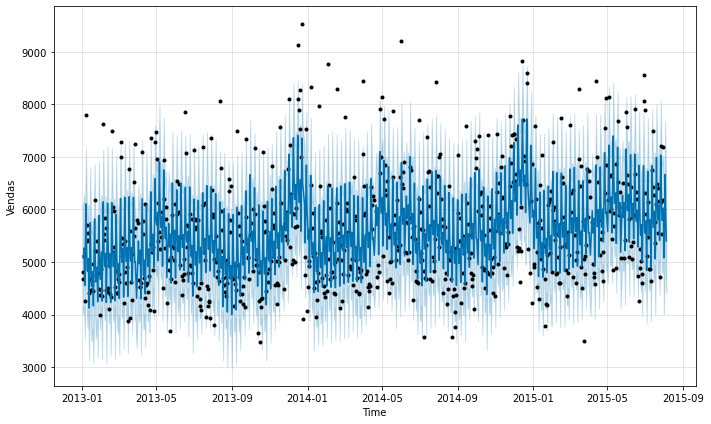

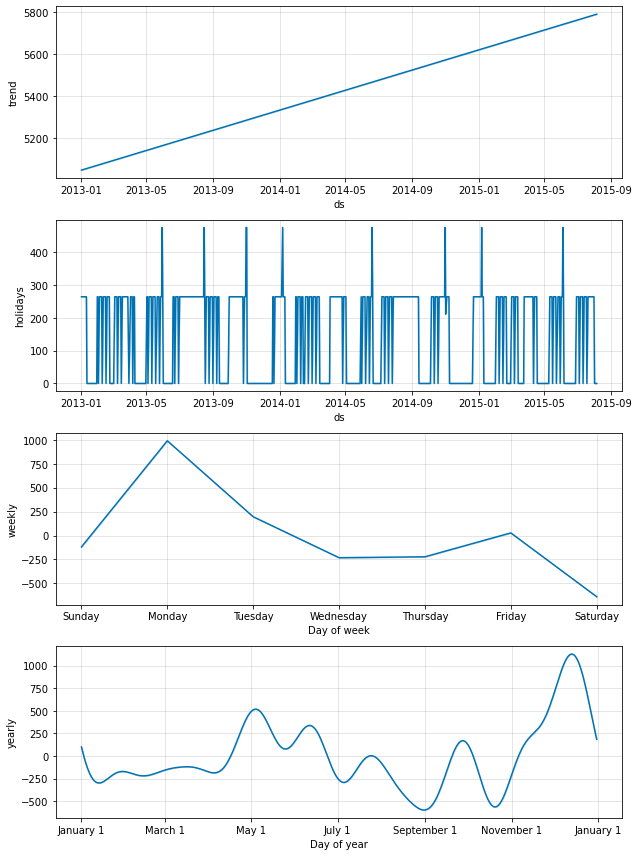

In [96]:
df_original, df_prediction = previsao_vendas(10, bd_completo, school_state_holidays, 5)

In [97]:
df_prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-02,5048.322502,4027.431659,6128.993809,5048.322502,5048.322502,69.415650,69.415650,69.415650,264.396192,...,-231.931184,-231.931184,-231.931184,36.950643,36.950643,36.950643,0.0,0.0,0.0,5117.738152
1,2013-01-03,5049.107036,4023.849570,6086.367686,5049.107036,5049.107036,20.402547,20.402547,20.402547,264.396192,...,-222.515891,-222.515891,-222.515891,-21.477753,-21.477753,-21.477753,0.0,0.0,0.0,5069.509583
2,2013-01-04,5049.891570,4148.749814,6272.684606,5049.891570,5049.891570,216.937341,216.937341,216.937341,264.396192,...,27.221864,27.221864,27.221864,-74.680714,-74.680714,-74.680714,0.0,0.0,0.0,5266.828910
3,2013-01-05,5050.676104,3535.880602,5624.815148,5050.676104,5050.676104,-497.336646,-497.336646,-497.336646,264.396192,...,-639.433271,-639.433271,-639.433271,-122.299566,-122.299566,-122.299566,0.0,0.0,0.0,4553.339458
4,2013-01-07,5052.245171,5156.813631,7153.061029,5052.245171,5052.245171,1054.318431,1054.318431,1054.318431,264.396192,...,989.869784,989.869784,989.869784,-199.947545,-199.947545,-199.947545,0.0,0.0,0.0,6106.563602
